In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import pyproj
import rasterio
import rasterstats
import pandas as pd
import json
import rasterio.mask
from rasterio.mask import mask
import rasterio.plot
from rasterio.plot import show
import matplotlib.colors as pltc
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib
import rasterio.warp
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterstats import zonal_stats
from rasterio.merge import merge
import glob
import os
import fiona

%matplotlib inline

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [6]:
zambia = geopandas.read_file("C:/Users/yoko1/Box/ACE 592 Project/zambia adm shp/zmb_admbnda_adm0_dmmu_20201124.shp")

<AxesSubplot:>

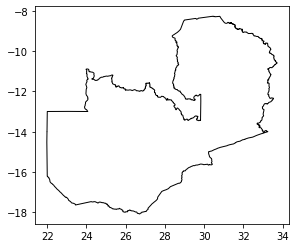

In [10]:
fig, ax = plt.subplots()
zambia.plot(ax=ax, facecolor='none', edgecolor='black')

In [2]:
data_dir = "C:/Users/yoko1/Box/ACE 592 Project/Rainfall data/rainfall_chirps/"

In [8]:
rain2015 = rasterio.open(data_dir + "chirps-v2.0.2015.tif")
rain2016 = rasterio.open(data_dir + "chirps-v2.0.2016.tif")
rain2017 = rasterio.open(data_dir + "chirps-v2.0.2017.tif")
rain2018 = rasterio.open(data_dir + "chirps-v2.0.2018.tif")
rain2019 = rasterio.open(data_dir + "chirps-v2.0.2019.tif")

In [10]:
zambia.crs == rain2015.crs

True

In [15]:
with fiona.open("C:/Users/yoko1/Box/ACE 592 Project/zambia adm shp/zmb_admbnda_adm0_dmmu_20201124.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [20]:
img_out, img_transform = mask(rain2015,shapes,crop=True) 

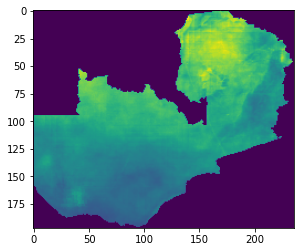

In [21]:
plt.imshow(img_out[0,:,:])

In [24]:
img_out = img_out[:,:,:]

out_meta = rain2015.meta.copy()
out_meta['height'] = img_out.shape[1]
out_meta['width'] = img_out.shape[2]
out_meta['transform'] = img_transform
        
out_meta['nodata'] = 0
        
with rasterio.open(data_dir+"./zambia_rain_2015.tif", "w", **out_meta) as dest:
            dest.write(img_out)

In [26]:
img_out, img_transform = mask(rain2016,shapes,crop=True) 

img_out = img_out[:,:,:]

out_meta = rain2016.meta.copy()
out_meta['height'] = img_out.shape[1]
out_meta['width'] = img_out.shape[2]
out_meta['transform'] = img_transform
        
out_meta['nodata'] = 0
        
with rasterio.open(data_dir+"./zambia_rain_2016.tif", "w", **out_meta) as dest:
            dest.write(img_out)

In [27]:
img_out, img_transform = mask(rain2017,shapes,crop=True) 

img_out = img_out[:,:,:]

out_meta = rain2017.meta.copy()
out_meta['height'] = img_out.shape[1]
out_meta['width'] = img_out.shape[2]
out_meta['transform'] = img_transform
        
out_meta['nodata'] = 0
        
with rasterio.open(data_dir+"./zambia_rain_2017.tif", "w", **out_meta) as dest:
            dest.write(img_out)

In [28]:
img_out, img_transform = mask(rain2018,shapes,crop=True) 

img_out = img_out[:,:,:]

out_meta = rain2018.meta.copy()
out_meta['height'] = img_out.shape[1]
out_meta['width'] = img_out.shape[2]
out_meta['transform'] = img_transform
        
out_meta['nodata'] = 0
        
with rasterio.open(data_dir+"./zambia_rain_2018.tif", "w", **out_meta) as dest:
            dest.write(img_out)

In [29]:
img_out, img_transform = mask(rain2019,shapes,crop=True) 

img_out = img_out[:,:,:]

out_meta = rain2019.meta.copy()
out_meta['height'] = img_out.shape[1]
out_meta['width'] = img_out.shape[2]
out_meta['transform'] = img_transform
        
out_meta['nodata'] = 0
        
with rasterio.open(data_dir+"./zambia_rain_2019.tif", "w", **out_meta) as dest:
            dest.write(img_out)

## Now create maps

In [2]:
hh = geopandas.read_file("C:/Users/yoko1/Box/ACE 592 Project/Deforestation data/Deforestation/buffer_3km/Export_Output_2.shp")

In [3]:
data_dir = "C:/Users/yoko1/Box/ACE 592 Project/Rainfall data/rainfall_chirps/"

In [4]:
rain2015 = rasterio.open(data_dir + "zambia_rain_2015.tif")
rain2016 = rasterio.open(data_dir + "zambia_rain_2016.tif")
rain2017 = rasterio.open(data_dir + "zambia_rain_2017.tif")
rain2018 = rasterio.open(data_dir + "zambia_rain_2018.tif")
rain2019 = rasterio.open(data_dir + "zambia_rain_2019.tif")

In [44]:
hh.crs == rain2015.crs

True

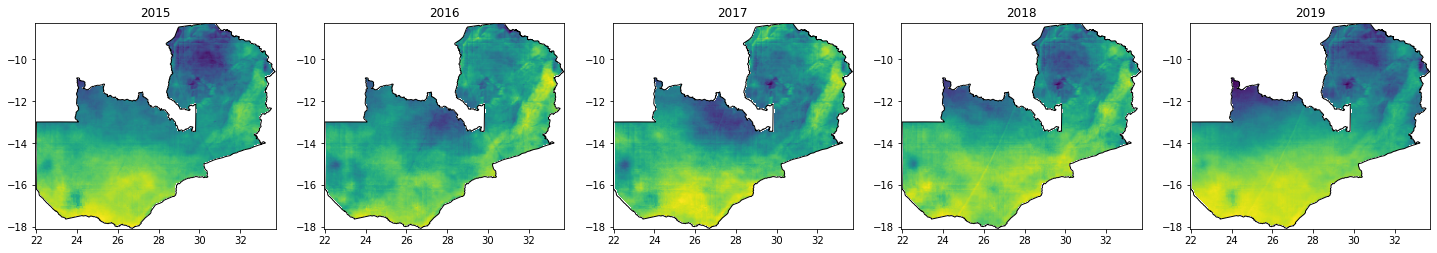

In [17]:
fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1, ncols=5,figsize=(25, 15))

# 2015
rasterio.plot.show(rain2015, ax=ax1,cmap='viridis_r')
ax1.set_title("2015")
zambia.plot(ax=ax1, facecolor='none', edgecolor='black')

# 2016
rasterio.plot.show(rain2016, ax=ax2,cmap='viridis_r')
ax2.set_title("2016")
zambia.plot(ax=ax2, facecolor='none', edgecolor='black')

# 2017
rasterio.plot.show(rain2017, ax=ax3,cmap='viridis_r')
ax3.set_title("2017")
zambia.plot(ax=ax3, facecolor='none', edgecolor='black')

# 2018
rasterio.plot.show(rain2018, ax=ax4,cmap='viridis_r')
ax4.set_title("2018")
zambia.plot(ax=ax4, facecolor='none', edgecolor='black')

# 2019
rasterio.plot.show(rain2019, ax=ax5,cmap='viridis_r')
ax5.set_title("2019")
zambia.plot(ax=ax5, facecolor='none', edgecolor='black')

fig.savefig("C:/Users/yoko1/Box/ACE 592 Project/figures/2015-2019 rainfall.png",dpi=300, bbox_inches = "tight")

In [11]:
zambia = zambia.to_crs(hh.crs)
hh_clipped = geopandas.clip(hh,zambia)

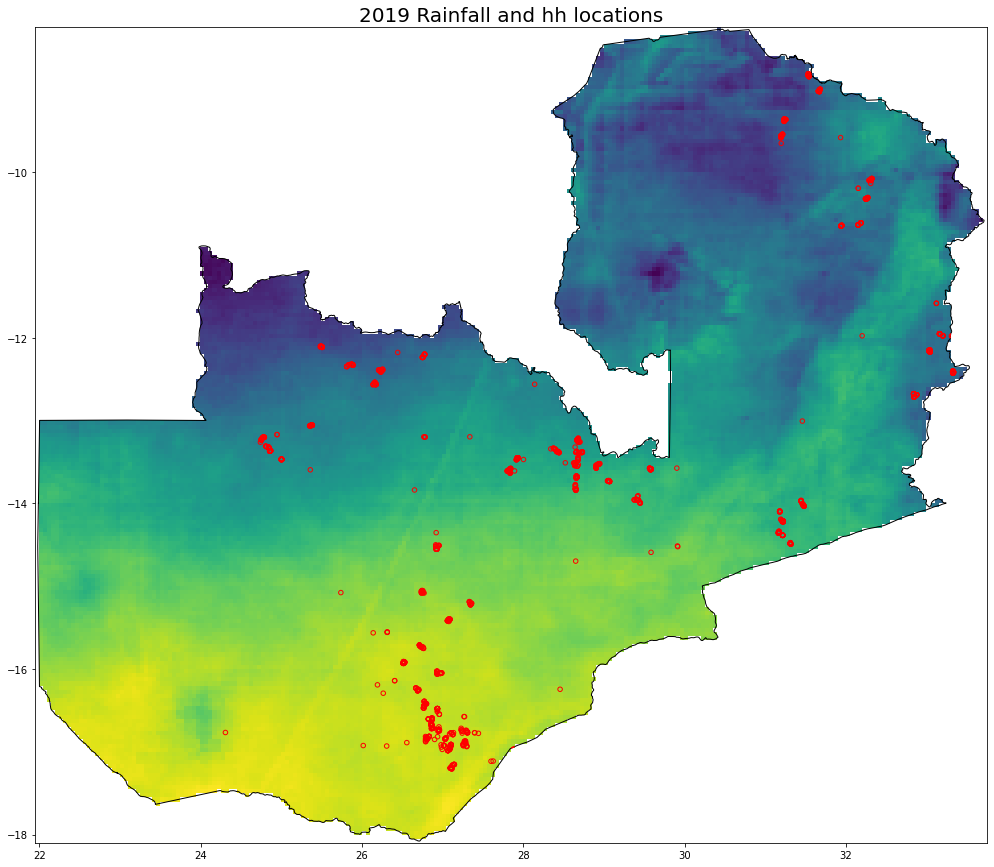

In [15]:
fig, ax = plt.subplots(figsize=(25, 15))
rasterio.plot.show(rain2019, ax=ax,cmap='viridis_r')
ax.set_title("2019 Rainfall and hh locations", fontsize = 20)
zambia.plot(ax=ax, facecolor='none', edgecolor='black')

hh_clipped.plot(ax=ax, facecolor='none', edgecolor='red')

fig.savefig("C:/Users/yoko1/Box/ACE 592 Project/figures/2019 rainfall and hh locations.png",dpi=300, bbox_inches = "tight")